In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
# Define the loss
criterion = nn.CrossEntropyLoss()

In [6]:
# Get our data
images, labels = next(iter(trainloader))

In [7]:
images.shape

torch.Size([64, 1, 28, 28])

In [8]:
labels.shape

torch.Size([64])

In [9]:
# Flatten images
images = images.view(images.shape[0], -1)

In [10]:
images.shape

torch.Size([64, 784])

In [11]:
28*28

784

In [12]:
# Forward pass, get our logits
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

logits = model(images)

In [13]:
logits.shape

torch.Size([64, 10])

In [14]:
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

In [15]:
loss

tensor(2.2996, grad_fn=<NllLossBackward>)

# Autograd

In [16]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.8253, -0.3574],
        [ 0.5915,  1.3430]], requires_grad=True)


In [17]:
y = x**2
print(y)

tensor([[0.6810, 0.1277],
        [0.3499, 1.8036]], grad_fn=<PowBackward0>)


In [18]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [19]:
z = y.mean()

In [20]:
z

tensor(0.7406, grad_fn=<MeanBackward0>)

In [21]:
x

tensor([[ 0.8253, -0.3574],
        [ 0.5915,  1.3430]], requires_grad=True)

In [22]:
x.grad

In [23]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.4126, -0.1787],
        [ 0.2958,  0.6715]])
tensor([[ 0.4126, -0.1787],
        [ 0.2958,  0.6715]], grad_fn=<DivBackward0>)


# Loss and Autograd together

In [24]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [25]:
print(model[0].weight.grad)

None


In [26]:
loss.backward()

In [27]:
print(model[0].weight.grad)

tensor([[-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029]])


# Training for Real

In [28]:
from torch import optim

In [29]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [30]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9498089168117498
Training loss: 0.8835471659453947
Training loss: 0.5336451658816226
Training loss: 0.43445018308757466
Training loss: 0.3895100897340886


# Prediction

In [31]:
images, labels = next(iter(trainloader))

In [32]:
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

In [33]:
# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

In [34]:
ps

tensor([[1.8098e-03, 1.7224e-05, 3.4715e-04, 9.4837e-01, 3.2507e-06, 4.7019e-02,
         1.3543e-05, 7.4434e-06, 2.3978e-03, 9.7567e-06]])

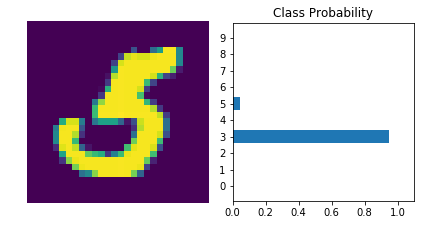

In [35]:
%matplotlib inline
import helper
helper.view_classify(img.view(1, 28, 28), ps)